In [8]:
import numpy as np
import pandas as pd
import os
import pathlib
import scanpy as sc
from anndata import AnnData

In [9]:
imc_directory = '/home/matthieu.bernard/Documents/IF_to_IMC/data/true_data/IMC_morphology'

path_test_csv = '/home/matthieu.bernard/Documents/IF_to_IMC/data/true_data/IMC_morphology/15T011146-16_Ir191_1.ome.tiff_measurements.csv'

In [36]:
df = pd.read_csv(path_test_csv,sep='\t')

# Get rid of useless columns
df = df.drop(columns=['Image','Object ID', 'Object type', 'Name', 'Classification', 'Parent', 'ROI', 'Centroid X px', 'Centroid Y px', 'Cytoplasm: DNA1 min', 'Cell: DNA1 min'])

nan_positions = df.isna()   

# Get row and column indices of NaN values
nan_indices = nan_positions[nan_positions == True].stack().index.tolist()
print(nan_indices)  #

df.head()

[]


,Cell: Area,Cell: Perimeter,Cell: Circularity,Cell: Max caliper,Cell: Min caliper,Cell: Eccentricity,Cell: DNA1 mean,Cell: DNA1 std dev,Cell: DNA1 max,Cytoplasm: DNA1 mean,Cytoplasm: DNA1 std dev,Cytoplasm: DNA1 max
0,105.0,45.1343,0.6477,19.6909,7.4116,0.9146,51.1298,57.1313,189.6186,17.4177,27.4268,119.0803
1,130.0,44.9770,0.8076,17.0801,10.0000,0.8004,21.3204,29.6603,146.4840,5.6932,8.0553,36.1546
2,152.0,48.6567,0.8068,18.5225,10.8395,0.8404,49.0460,54.3640,179.2913,14.2743,19.8487,95.4839
3,223.0,58.6199,0.8155,20.6909,14.6535,0.6873,29.5497,27.3989,126.7512,13.0877,14.1345,60.9674
4,61.0,31.7174,0.7620,12.8710,6.6667,0.8422,54.8965,59.6811,196.6441,16.4283,27.6506,139.3112


In [37]:
import scanpy as sc

# Load or read your AnnData object
adata = AnnData(df) # Example dataset

# Preprocessing (standard steps)
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)

sc.pp.scale(adata, max_value=10)

# Neighborhood graph
sc.pp.neighbors(adata, n_neighbors=10, n_pcs=2)

# UMAP embedding
sc.tl.umap(adata)

# Plot

/home/matthieu.bernard/miniconda3/envs/env/lib/python3.13/site-packages/anndata/_core/aligned_df.py:68: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


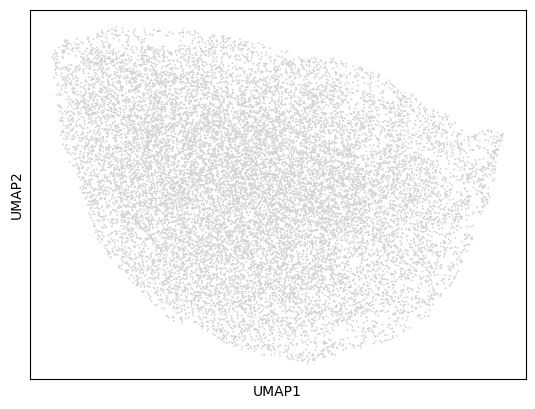

In [38]:
sc.pl.umap(adata)